In [1]:
import torch
from torch import nn
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.io as spio
from sklearn.decomposition import PCA

from modules import optimize_MLE

### Load data

In [2]:
# load sample trajectory
sim_idx = 0 # which out of the 100 trajectories to use
data_path = Path('data') / 'sim'
f_name = 'sim_0002.mat'
S = spio.loadmat(Path(data_path) / f_name)['S']
S_list = [S[0, i] for i in range(S.shape[1])]  # convert to list of structs

# unpack data
n_corr_obs = S_list[sim_idx]['Pc_reshaped'][0, 0] * S_list[sim_idx]['num_trials_mat'][0, 0]
n_total_obs = S_list[sim_idx]['num_trials_mat'][0, 0]
n_frames = S_list[sim_idx]['Pc_reshaped'][0, 0].shape[0]
# n_dim = S_list[sim_idx]['x'][0, 0].shape[0]
n_dim = 2

### Run optimization

In [3]:
# loss, x, c, p = run_MLEfit(n_dim, n_corr_obs, n_total_obs)
x, c, p, _, _, _, _ = optimize_MLE(n_dim, n_corr_obs, n_total_obs, verbose=True, n_starts=10)

Current loss: 549.6100153774023
Loss updated
Iteration 1 | Loss: 549.6100153774023
Current loss: 595.5454031229019
Iteration 2 | Loss: 595.5454031229019
Current loss: 469.3840305432677
Loss updated
Iteration 3 | Loss: 469.3840305432677
Current loss: 463.41787016764283
Loss updated
Iteration 4 | Loss: 463.41787016764283
Current loss: 457.79778534173965
Loss updated
Iteration 5 | Loss: 457.79778534173965
Current loss: 502.8416304588318
Iteration 6 | Loss: 502.8416304588318
Current loss: 469.66099720075727
Iteration 7 | Loss: 469.66099720075727
Iteration 8 | Loss: 457.4209614917636
Iteration 9 | Loss: 459.4400150924921
Current loss: 452.52585622668266
Loss updated
Iteration 10 | Loss: 452.52585622668266


In [4]:
# plt.plot(loss)
# plt.title('Loss over iterations')
# plt.show()

In [4]:
# compute PC-reduced perceptual locations
pca_true = PCA(n_components=2)
pca_fit = PCA(n_components=2)

# ground truth perceptual locations
pca_true.fit(S_list[sim_idx]['x'][0, 0])
pc_true = pca_true.components_

pca_fit.fit(x.squeeze().detach())
pc_fit = pca_fit.components_

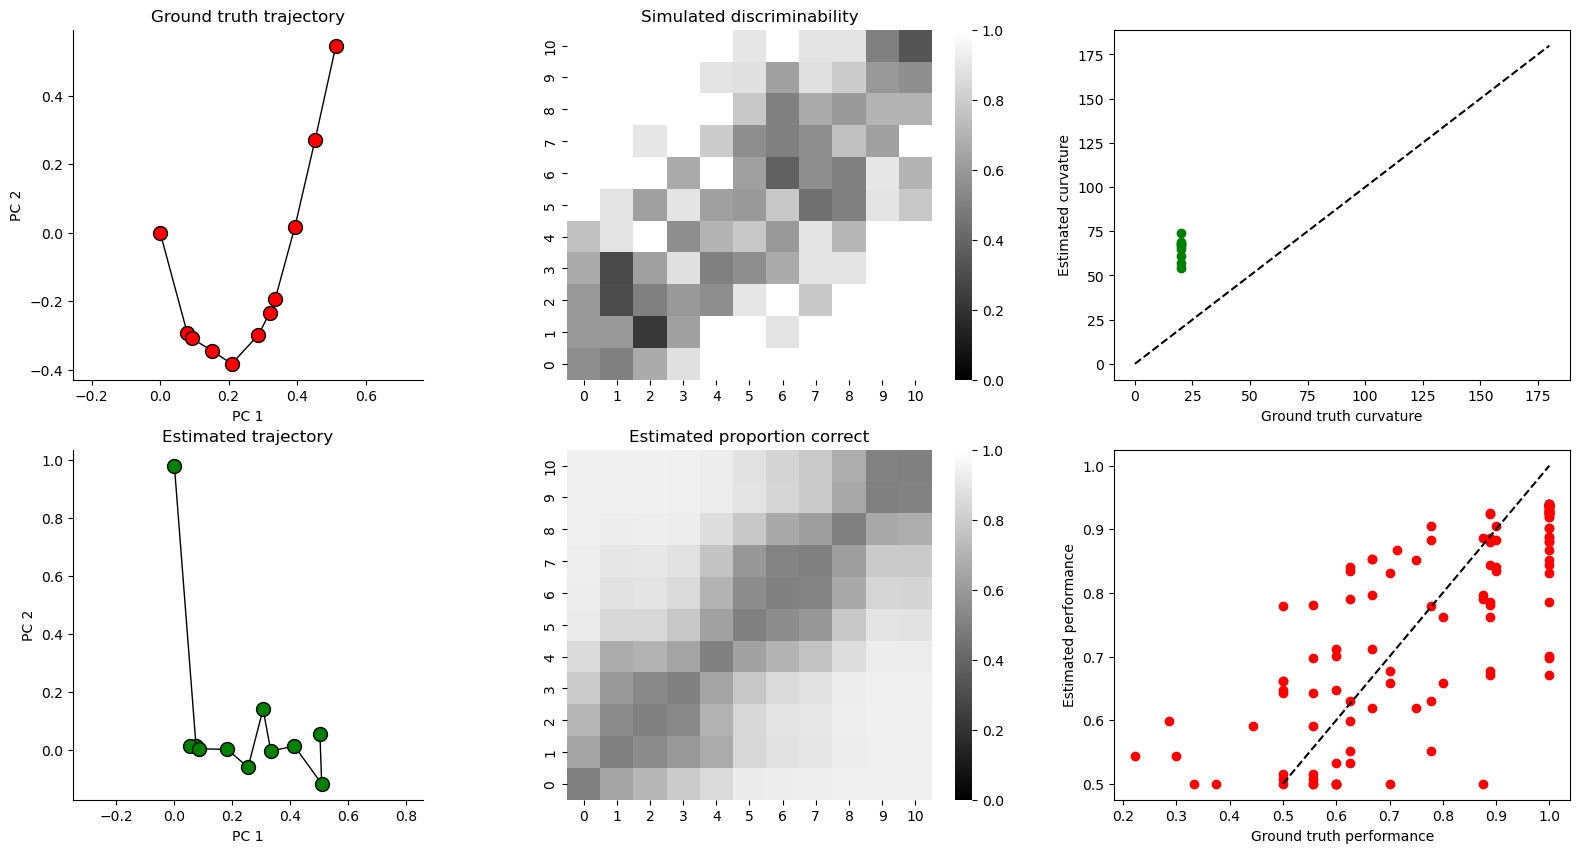

In [5]:
fig, axs = plt.subplots(2, 3, figsize=(20, 10))
axs[0, 0].plot(pc_true[0, :], pc_true[1, :], '-ko', markersize=10, markerfacecolor='r', linewidth=1)
axs[0, 0].set_title('Ground truth trajectory')
axs[0, 0].set_xlabel('PC 1')
axs[0, 0].set_ylabel('PC 2')
axs[0, 0].set_box_aspect(1)  
axs[0, 0].set_aspect('equal') 
axs[0, 0].spines['top'].set_visible(False)  
axs[0, 0].spines['right'].set_visible(False)

sns.heatmap(S_list[sim_idx]['Pc_reshaped'][0, 0], ax=axs[0, 1], cmap='gray', vmin=0, vmax=1)
axs[0, 1].invert_yaxis()
axs[0, 1].set_title('Simulated discriminability')

axs[0, 2].plot(np.rad2deg(S_list[sim_idx]['c'][0, 0]).flatten(), torch.flatten(torch.rad2deg(c)).detach(), 'go')
axs[0, 2].plot([0, 180], [0, 180], 'k--')
axs[0, 2].set_xlabel('Ground truth curvature')
axs[0, 2].set_ylabel('Estimated curvature')

axs[1, 0].plot(pc_fit[0, :], pc_fit[1, :], '-ko', markersize=10, markerfacecolor='g', linewidth=1)
axs[1, 0].set_title('Estimated trajectory')
axs[1, 0].set_xlabel('PC 1')
axs[1, 0].set_ylabel('PC 2')
axs[1, 0].set_box_aspect(1)  
axs[1, 0].set_aspect('equal') 
axs[1, 0].spines['top'].set_visible(False)  
axs[1, 0].spines['right'].set_visible(False)

sns.heatmap(p.squeeze(), ax=axs[1, 1], cmap='gray', vmin=0, vmax=1)
axs[1, 1].invert_yaxis()
axs[1, 1].set_title('Estimated proportion correct')

axs[1, 2].plot(S_list[sim_idx]['Pc_reshaped'][0, 0].flatten(), p.flatten(), 'ro')
axs[1, 2].plot([0.5, 1], [0.5, 1], 'k--')
axs[1, 2].set_xlabel('Ground truth performance')
axs[1, 2].set_ylabel('Estimated performance')

plt.show()